In [1]:
import numpy as np
import matplotlib.pylab as plt
P=[1,4,8,12,16,20,24,28,32,36,40,44,48]
def READ(name, name_time):
    f = open(name, "r")
    # modo stupido per leggere tutti i tempi (però funge...), forse un giorno scriverò qualcosa di meglio
    out=f.readlines()
    p4=[] ; p8=[] ; p12=[] ; p16=[] ; p20=[] ; p24=[] 
    p28=[] ; p32=[] ; p36=[] ; p40=[] ; p44=[] ; p48=[] 
    for i in range(4):
        p4.append(float(out[i+2]))
    for i in range(8):
        p8.append(float(out[i+2+5]))  
    for i in range(12):
        p12.append(float(out[i+2+5+9])) 
    for i in range(16):
        p16.append(float(out[i+2+5+9+13])) 
    for i in range(20):
        p20.append(float(out[i+2+5+9+13+17])) 
    for i in range(24):
        p24.append(float(out[i+2+5+9+13+17+21])) 
    for i in range(28):
        p28.append(float(out[i+2+5+9+13+17+21+25])) 
    for i in range(32):
        p32.append(float(out[i+2+5+9+13+17+21+25+29])) 
    for i in range(36):
        p36.append(float(out[i+2+5+9+13+17+21+25+29+33])) 
    for i in range(40):
        p40.append(float(out[i+2+5+9+13+17+21+25+29+33+37])) 
    for i in range(44):
        p44.append(float(out[i+2+5+9+13+17+21+25+29+33+37+41]))
    for i in range(48):
        p48.append(float(out[i+2+5+9+13+17+21+25+29+33+37+41+45])) 
    f.close()
    time=[]
    time.append(float(out[0]))
    time.append(max(p4)); time.append(max(p8)); time.append(max(p12)); time.append(max(p16))
    time.append(max(p20)); time.append(max(p24)); time.append(max(p28)); time.append(max(p32))
    time.append(max(p36)); time.append(max(p40)); time.append(max(p44)); time.append(max(p48))
    del p4, p8, p12, p16, p20, p24, p28, p32, p36, p40, p44, p48
    time = np.asarray(time)
    f = open(name_time,"r")
    bintime=[]
    out=f.readlines()
    numero=1
    for i in range(0,25,2):
        tmp=''
        for l in out[i]:
            if (l.isnumeric() or l=='.'):
                tmp += l
            else:
                break
        bintime.append(float(tmp)/numero)
        numero=(i+2)*2
    f.close()
    bintime = np.asarray(bintime)
    return time, bintime

def ERROR(t1, t2, t3):
    res=[]
    for i in range(len(t1)):
        tmax=max(t1[i],t2[i],t3[i])
        tmin=min(t1[i],t2[i],t3[i])
        res.append((tmax-tmin)/2)
    return np.asarray(res)

In [15]:
n=8
t1, bt1 = READ('out.mpi.s'+str(n)+'.1','out.time.mpi.s'+str(n)+'.1')
t2, bt2 = READ('out.mpi.s'+str(n)+'.2','out.time.mpi.s'+str(n)+'.2')
t3, bt3 = READ('out.mpi.s'+str(n)+'.3','out.time.mpi.s'+str(n)+'.3')
tm = ( t1 + t2 + t3 )/3
btm = ( bt1 + bt2 + bt3 )/3
te = ERROR(t1,t2,t3)
bte = ERROR(bt1,bt2,bt3)
S = tm[0]/tm
Sb = btm[0]/btm

In [6]:
if n<10: nn='0'+str(n)
else: nn=str(n)
f = open("strong-scalability-10to"+nn+".csv","w")
f.write('# processors run1,run2,run 3,avg,error_bar\n')  
for i in range(len(t1)):
    f.write('%2d, %8f, %8f, %8f, %8f, %8f\n' %(P[i],t1[i],t2[i],t3[i],tm[i],te[i]))

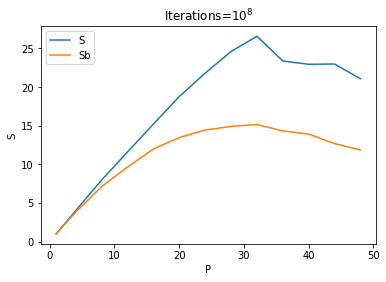

In [22]:
_=plt.plot(P,S, label='S')
_=plt.plot(P,Sb, label='Sb')
_=plt.legend() ; plt.xlabel('P') ; plt.ylabel('S')
_=plt.title(r"Iterations=$10^%d$"%n)

In [ ]:
_=plt.errorbar(P,tm,yerr=te, label='t')
_=plt.errorbar(P,btm,yerr=bte, label='ubt')
_=plt.legend() ; _=plt.xlabel('P'); _=plt.ylabel('time (avg)')